In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import homogeneity_score
from sklearn import metrics
from sklearn.cluster import DBSCAN
from numpy import unique
from numpy import where
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
from sklearn.metrics.cluster import contingency_matrix
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.mixture import GaussianMixture

from sklearn.cluster import AgglomerativeClustering

In [2]:
def plot_cluster(x,y,y_pred,num_cluster,cluster_name):
  pca=PCA(n_components=3)
  pca.fit(x)
  x3_plot=pca.transform(x)
  clusters = unique(y_pred)
  fig = plt.figure(figsize = (10, 7))
  ax = plt.axes(projection ="3d")
  for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(y_pred == cluster)
    # create scatter of these samples
    ax.scatter3D(x3_plot[row_ix, 0], x3_plot[row_ix, 1],x3_plot[row_ix, 2])
    plt.title("3D plot "+str(num_cluster)+" clusters using "+ cluster_name +" methode")
    
  plt.show()
  print("")
  print("")
  
  pca=PCA(n_components=2)
  pca.fit(x)
  x2_plot=pca.transform(x)
  plt.subplots(figsize=(12,8))
  for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(y_pred == cluster)
    # create scatter of these samples
    plt.scatter(x2_plot[row_ix, 0], x2_plot[row_ix, 1])
    plt.title("2D plot "+str(num_cluster)+" clusters using "+cluster_name+" methode")

  
  plt.show()


In [3]:
def clustering_report(x,y,y_predict,num_cluster,cluster_name):
  homogeneity=(metrics.homogeneity_score(y_predict,y))
  completeness=(metrics.completeness_score(y_predict,y))
  v_measure=(metrics.v_measure_score(y,y_predict))
  mutual_info=metrics.mutual_info_score(y,y_predict)
  silhoutte=metrics.silhouette_score(x, y_predict, metric='manhattan')
  calinski_harabasz = metrics.calinski_harabasz_score(x, y_predict)
  davies_bouldin= metrics.davies_bouldin_score(x, y_predict)

  print(str(num_cluster)+" Clusters "+cluster_name+" Clustering Report:")
  print("homogeneity: ",homogeneity)
  print("mutual information: ",mutual_info)
  print("v_measure: ",v_measure)
  print("silhoutte: ",silhoutte)
  print("davies bouldin: ",davies_bouldin)
  print("calinski_harabasz: ",calinski_harabasz)
  


# **Spectogram Features**

In [4]:
df=pd.read_csv(r'C:\Users\admin\OneDrive\Desktop\KARAJ_ML\Final_Data_spectgram.csv')

In [5]:
y=df[['voice_id','Age','Text_ID','Sex','emotion_ID']]
x=df.drop(['zero_crossing','spect_cent_mean','spect_rol_mean','voice_id','Age','Text_ID','Sex','emotion_ID'], axis = 1)
x.drop(columns=x.columns[0], axis=1, inplace=True)
pca=PCA(n_components=14)
pca.fit(x)
x_reduced=pca.transform(x)

**K Means**

2 cluster

2 Clusters K_Means Clustering Report:
homogeneity:  0.3594476632970776
mutual information:  0.2465982582007911
v_measure:  0.3577550859253475
silhoutte:  0.09573996309507204
davies bouldin:  2.5637220151543088
calinski_harabasz:  2310.637163141328


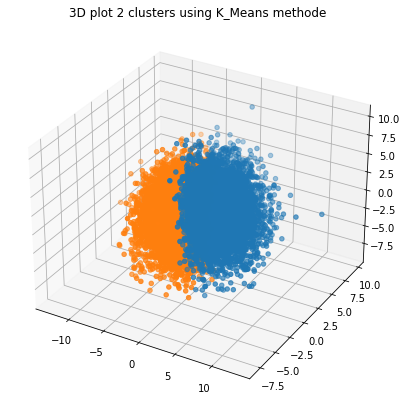

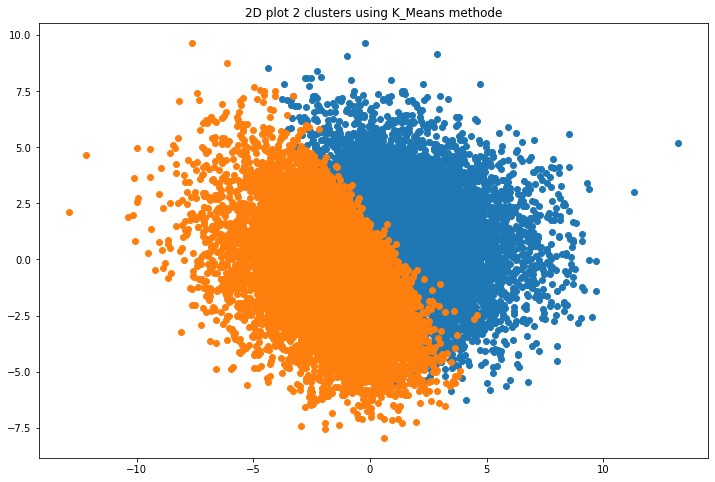

In [6]:
clf_kmeans = KMeans(n_clusters=2, random_state=42)
y_predict=clf_kmeans.fit_predict(x_reduced)
clustering_report(x_reduced,y["Sex"],y_predict,2,"K_Means")
plot_cluster(x_reduced,y["Sex"],y_predict,2,"K_Means")

4 cluster

4 Clusters K_Means Clustering Report:
homogeneity:  0.007448215921773789
mutual information:  0.010252217695813373
v_measure:  0.007421733864669898
silhoutte:  0.09737394201334638
davies bouldin:  1.9706100354598362
calinski_harabasz:  2069.435439275602


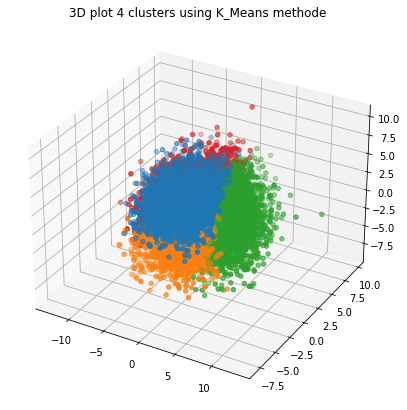

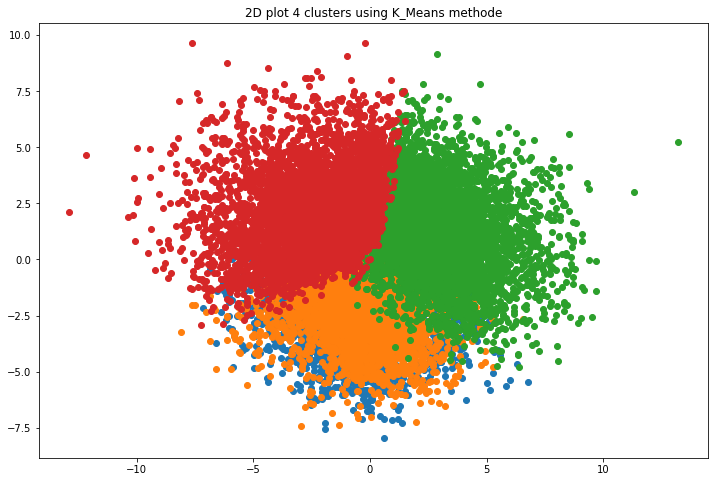

In [7]:
clf_kmeans = KMeans(n_clusters=4, random_state=42)
y_predict=clf_kmeans.fit_predict(x_reduced)
clustering_report(x_reduced,y["emotion_ID"],y_predict,4,"K_Means")
plot_cluster(x_reduced,y["emotion_ID"],y_predict,4,"K_Means")

10 cluster

10 Clusters K_Means Clustering Report:
homogeneity:  0.009585722481751156
mutual information:  0.02174621614616053
v_measure:  0.009514515295645534
silhoutte:  0.08611754116724342
davies bouldin:  2.026602100694459
calinski_harabasz:  1425.6071426553622


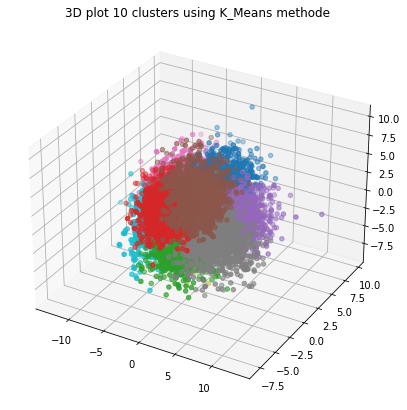

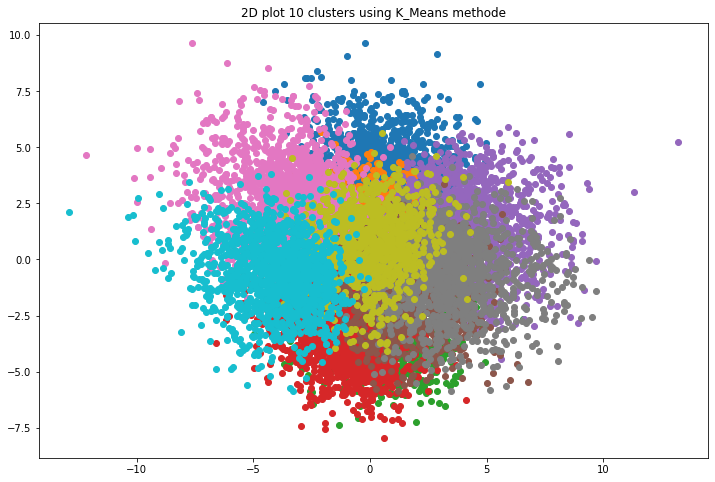

In [8]:
clf_kmeans = KMeans(n_clusters=10, random_state=42)
y_predict=clf_kmeans.fit_predict(x_reduced)
clustering_report(x_reduced,y["Text_ID"],y_predict,10,"K_Means")
plot_cluster(x_reduced,y["Text_ID"],y_predict,10,"K_Means")

**GMM**

2 Clusters GMM Clustering Report:
homogeneity:  0.448571063299629
mutual information:  0.3104220747356492
v_measure:  0.4484042213461966
silhoutte:  0.08044868934030508
davies bouldin:  2.7758116701924007
calinski_harabasz:  1967.6210870161979


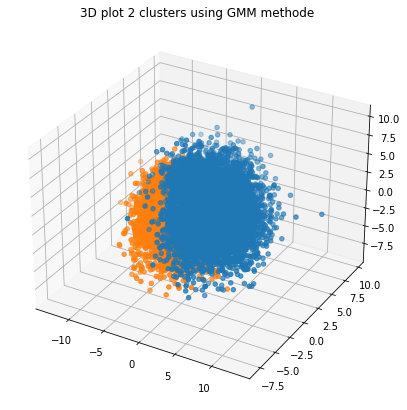

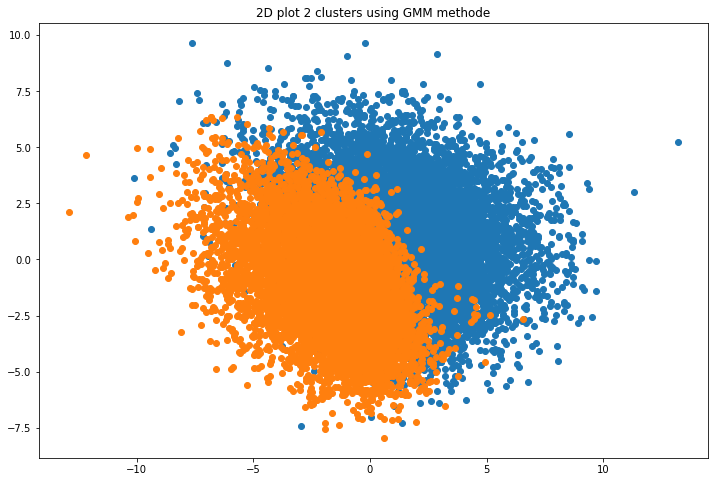

In [9]:
clf_gmm=GaussianMixture(n_components=2)
y_predict=clf_gmm.fit_predict(x_reduced)
clustering_report(x_reduced,y["Sex"],y_predict,2,"GMM")
plot_cluster(x_reduced,y["Sex"],y_predict,2,"GMM")

4 Clusters GMM Clustering Report:
homogeneity:  0.011426451689904566
mutual information:  0.015746975689321943
v_measure:  0.011392668417095905
silhoutte:  0.040576598985306085
davies bouldin:  3.333660568213911
calinski_harabasz:  1331.7280988088512


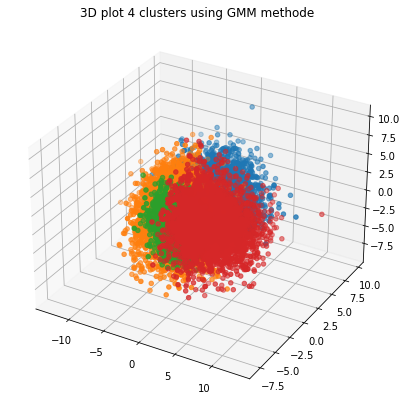

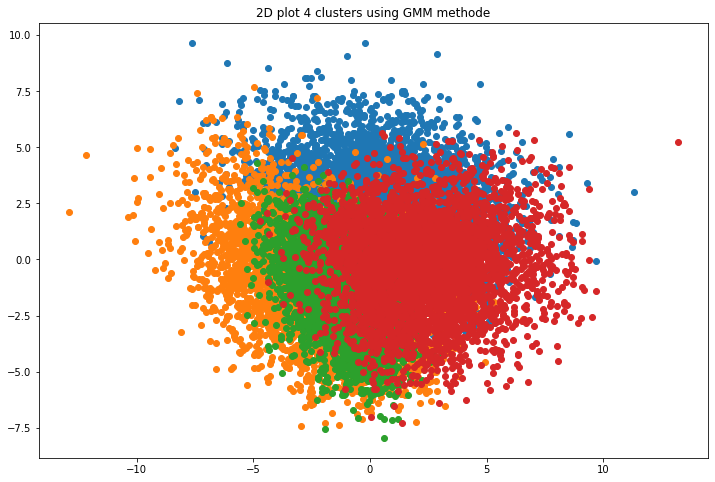

In [10]:
clf_gmm=GaussianMixture(n_components=4)
y_predict=clf_gmm.fit_predict(x_reduced)
clustering_report(x_reduced,y["emotion_ID"],y_predict,4,"GMM")
plot_cluster(x_reduced,y["emotion_ID"],y_predict,4,"GMM")

10 Clusters GMM Clustering Report:
homogeneity:  0.006042848018637367
mutual information:  0.01373224660178999
v_measure:  0.006003114402541006
silhoutte:  0.009368863140224124
davies bouldin:  2.849722302732162
calinski_harabasz:  857.4311814661856


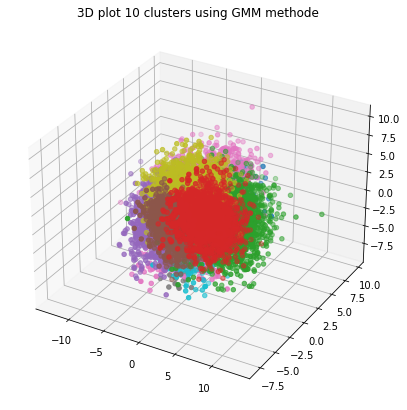

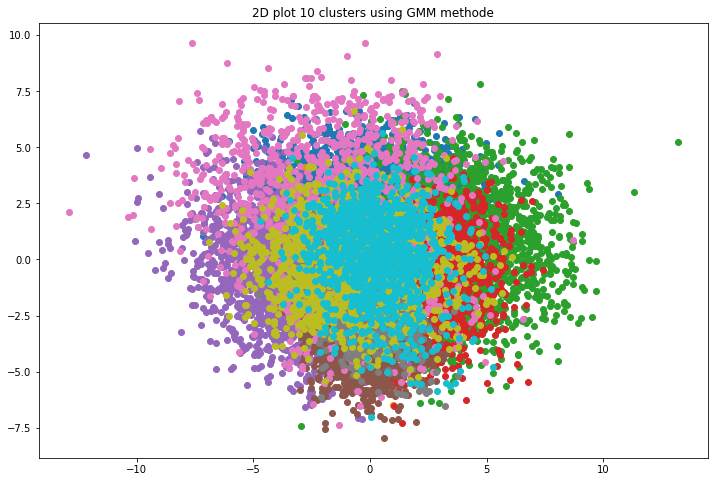

In [11]:
clf_gmm=GaussianMixture(n_components=10)
y_predict=clf_gmm.fit_predict(x_reduced)
clustering_report(x_reduced,y["Text_ID"],y_predict,10,"GMM")
plot_cluster(x_reduced,y["Text_ID"],y_predict,10,"GMM")

2 Clusters Heirical Clustering Report:
homogeneity:  0.26590389599226716
mutual information:  0.18400134399048537
v_measure:  0.2657973273516683
silhoutte:  0.07369087487201653
davies bouldin:  3.144820496407376
calinski_harabasz:  1550.581999661632


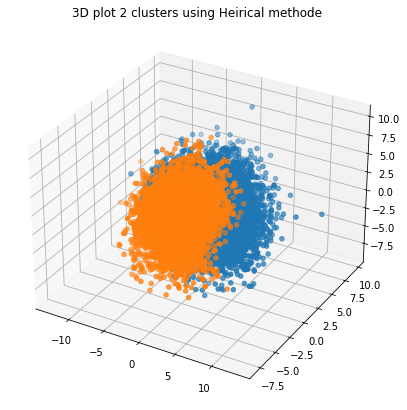

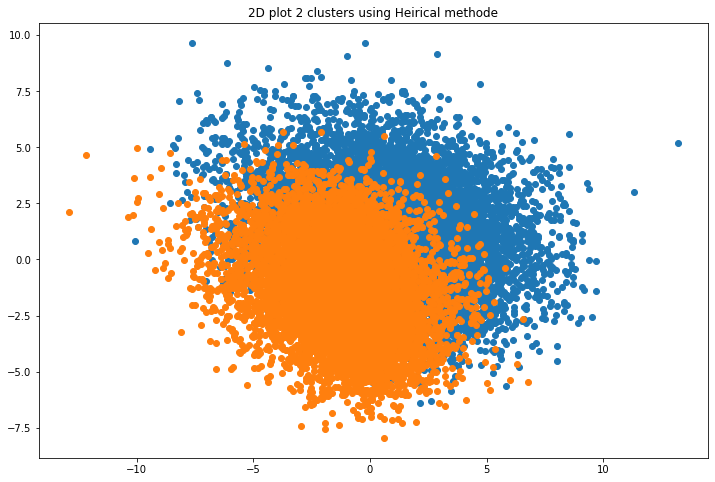

In [12]:
clf_herical=AgglomerativeClustering(n_clusters=2)
clf_herical.fit(x_reduced)
y_predict=clf_herical.fit_predict(x_reduced)
clustering_report(x_reduced,y["Sex"],y_predict,2,"Heirical")
plot_cluster(x_reduced,y["Sex"],y_predict,2,"Heirical")

4 Clusters Heirical Clustering Report:
homogeneity:  0.008770061304515013
mutual information:  0.01199050511943782
v_measure:  0.00870928916124969
silhoutte:  0.07047417865643608
davies bouldin:  2.2713952092608336
calinski_harabasz:  1601.0185486627877


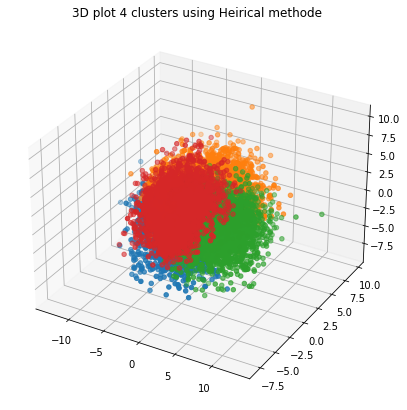

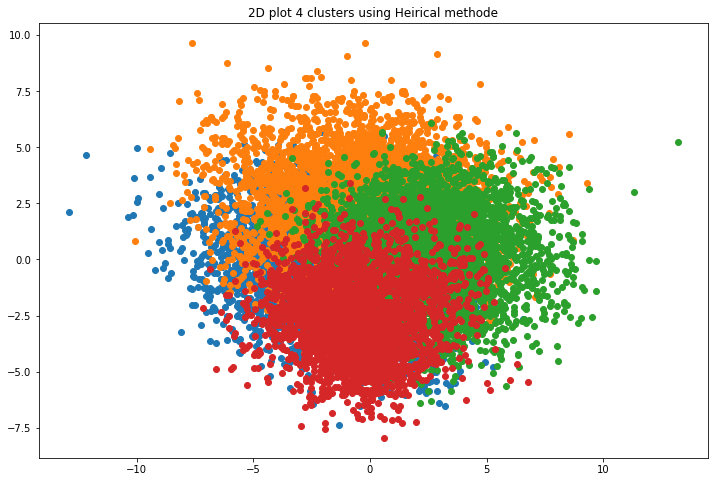

In [13]:
clf_herical=AgglomerativeClustering(n_clusters=4)
clf_herical.fit(x_reduced)
y_predict=clf_herical.fit_predict(x_reduced)
clustering_report(x_reduced,y["emotion_ID"],y_predict,4,"Heirical")
plot_cluster(x_reduced,y["emotion_ID"],y_predict,4,"Heirical")

10 Clusters Heirical Clustering Report:
homogeneity:  0.012340504951492526
mutual information:  0.0268790828521112
v_measure:  0.015081934967497478
silhoutte:  0.04684539752204872
davies bouldin:  2.274038999272027
calinski_harabasz:  1039.6122055080625


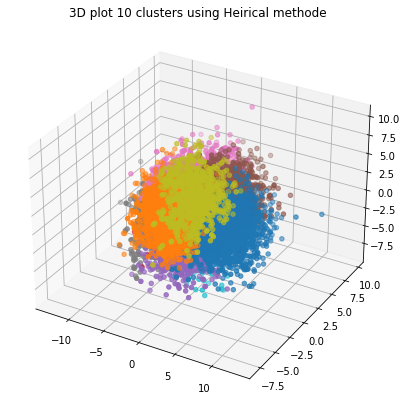

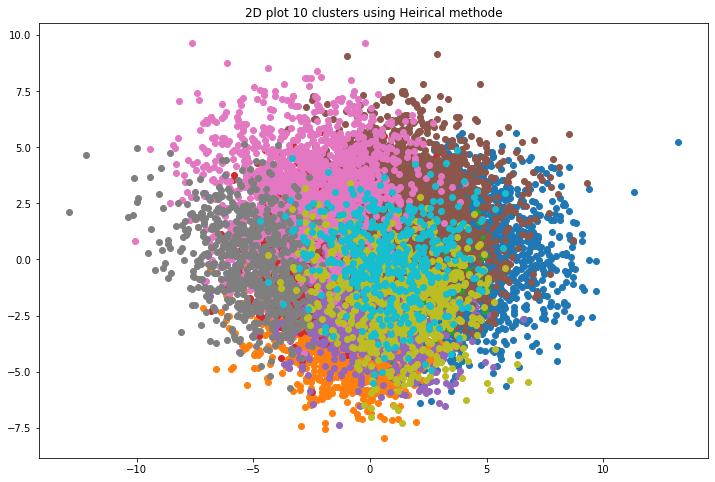

In [14]:
clf_herical=AgglomerativeClustering(n_clusters=10)
clf_herical.fit(x_reduced)
y_predict=clf_herical.fit_predict(x_reduced)
clustering_report(x_reduced,y["emotion_ID"],y_predict,10,"Heirical")
plot_cluster(x_reduced,y["emotion_ID"],y_predict,10,"Heirical")

# **Rythmic Features**

In [30]:
df=pd.read_csv(r'C:\Users\admin\OneDrive\Desktop\KARAJ_ML\Final_Data_rythm.csv')

In [33]:
y=df[['voice_id','Age','Text_ID','Sex','emotion_ID']]
x=df.drop(['Age','Text_ID','Sex','emotion_ID'], axis = 1)
x.drop(columns=x.columns[0], axis=1, inplace=True)
pca=PCA(n_components=14)
pca.fit(x)
x_reduced=pca.transform(x)

2 Clusters K_Means Clustering Report:
homogeneity:  9.347688910378505e-05
mutual information:  6.477416245126433e-05
v_measure:  9.350413278363775e-05
silhoutte:  0.6225009244963325
davies bouldin:  0.5020791865815077
calinski_harabasz:  50108.47868110464


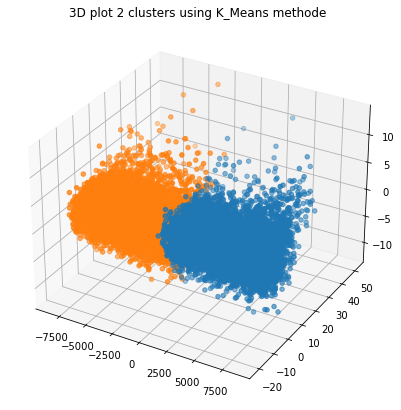

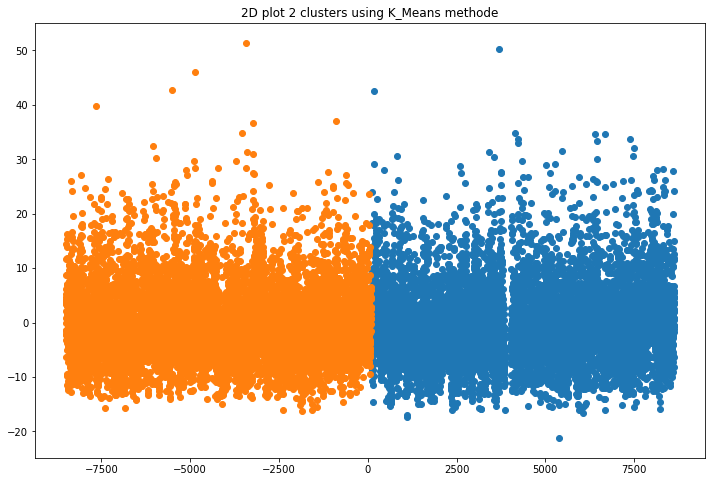

In [34]:
clf_kmeans = KMeans(n_clusters=2, random_state=42)
y_predict=clf_kmeans.fit_predict(x_reduced)
clustering_report(x_reduced,y["Sex"],y_predict,2,"K_Means")
plot_cluster(x_reduced,y["Sex"],y_predict,2,"K_Means")

4 Clusters K_Means Clustering Report:
homogeneity:  1.9635344204990015e-05
mutual information:  2.7211116838066207e-05
v_measure:  1.963204405815643e-05
silhoutte:  0.56988162354792
davies bouldin:  0.5002577206117109
calinski_harabasz:  85015.70023450584


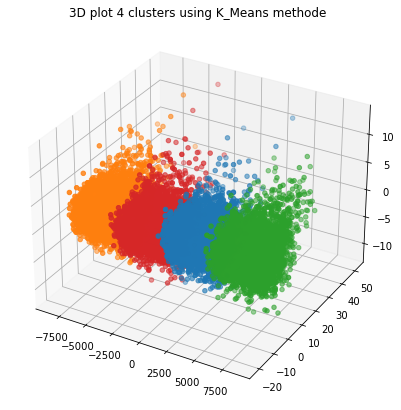

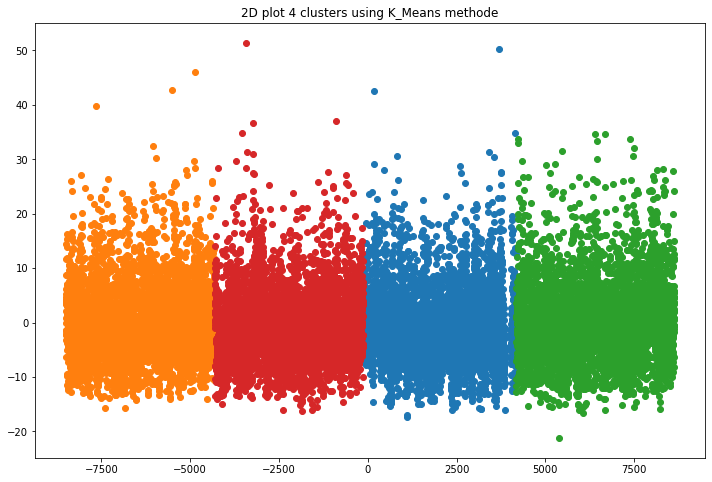

In [35]:
clf_kmeans = KMeans(n_clusters=4, random_state=42)
y_predict=clf_kmeans.fit_predict(x_reduced)
clustering_report(x_reduced,y["emotion_ID"],y_predict,4,"K_Means")
plot_cluster(x_reduced,y["emotion_ID"],y_predict,4,"K_Means")

10 Clusters K_Means Clustering Report:
homogeneity:  0.00010731530567649716
mutual information:  0.0002468621944140617
v_measure:  0.00010726362040916856
silhoutte:  0.5331613085489404
davies bouldin:  0.4982987787353855
calinski_harabasz:  188756.64844631977


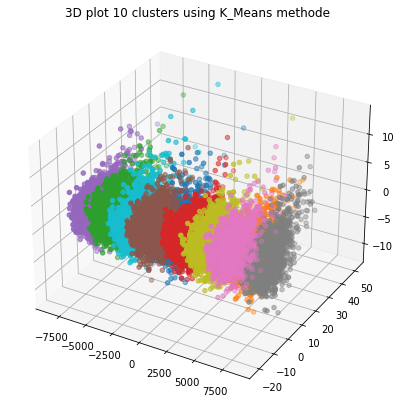

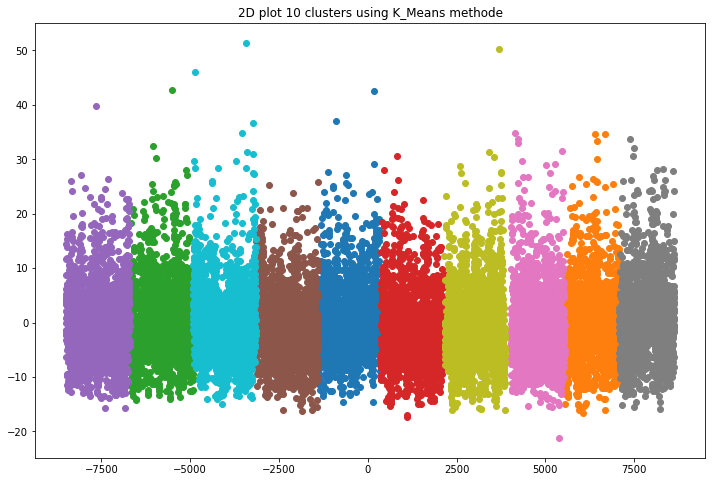

In [36]:
clf_kmeans = KMeans(n_clusters=10, random_state=42)
y_predict=clf_kmeans.fit_predict(x_reduced)
clustering_report(x_reduced,y["Text_ID"],y_predict,10,"K_Means")
plot_cluster(x_reduced,y["Text_ID"],y_predict,10,"K_Means")

2 Clusters GMM Clustering Report:
homogeneity:  1.0332491146322358e-05
mutual information:  7.1578657250825906e-06
v_measure:  1.0334086346891977e-05
silhoutte:  0.6183566622441287
davies bouldin:  0.504419068697261
calinski_harabasz:  49427.19856319352


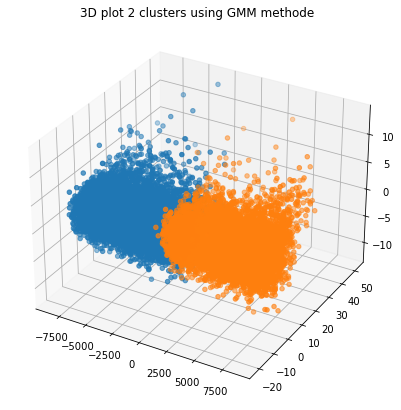

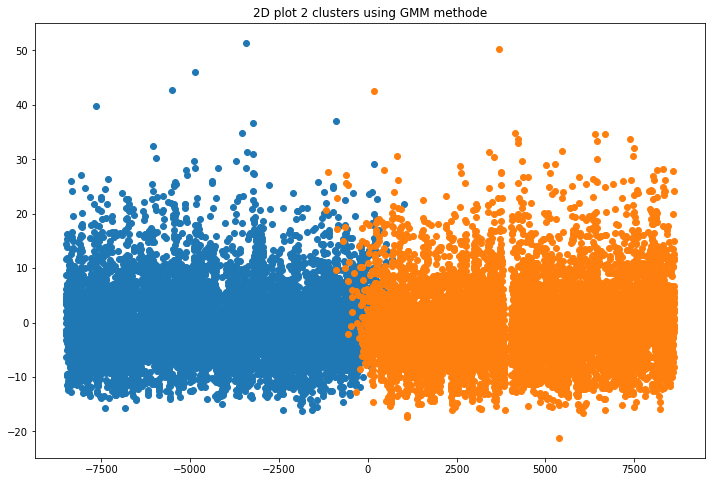

In [37]:
clf_gmm=GaussianMixture(n_components=2)
y_predict=clf_gmm.fit_predict(x_reduced)
clustering_report(x_reduced,y["Sex"],y_predict,2,"GMM")
plot_cluster(x_reduced,y["Sex"],y_predict,2,"GMM")

4 Clusters GMM Clustering Report:
homogeneity:  0.0037227444006303844
mutual information:  0.004884498117875974
v_measure:  0.003620348006346737
silhoutte:  -0.10420579305183235
davies bouldin:  9.545581525023596
calinski_harabasz:  2601.2576443846738


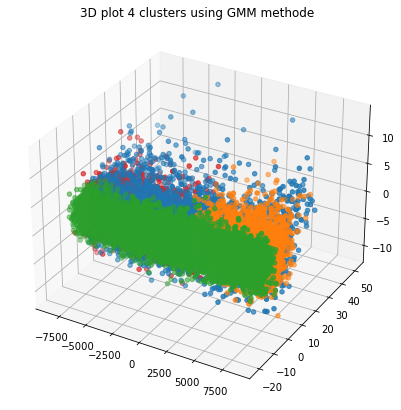

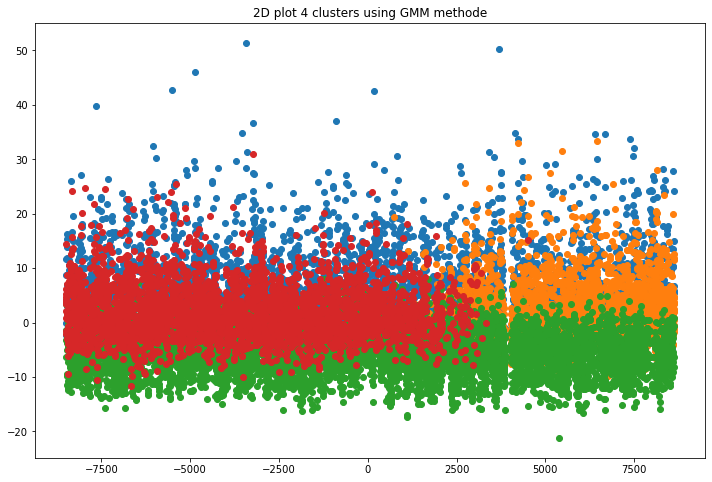

In [38]:
clf_gmm=GaussianMixture(n_components=4)
y_predict=clf_gmm.fit_predict(x_reduced)
clustering_report(x_reduced,y["emotion_ID"],y_predict,4,"GMM")
plot_cluster(x_reduced,y["emotion_ID"],y_predict,4,"GMM")

10 Clusters GMM Clustering Report:
homogeneity:  0.078502823267307
mutual information:  0.1711081910047719
v_measure:  0.07635000096483446
silhoutte:  -0.26831787780046557
davies bouldin:  19.674136053509418
calinski_harabasz:  1572.8504632108438


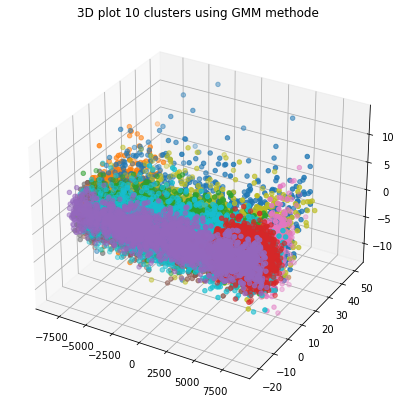

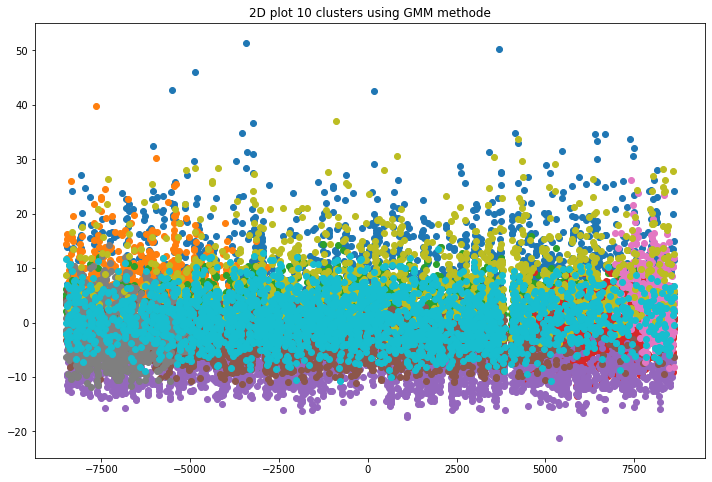

In [39]:
clf_gmm=GaussianMixture(n_components=10)
y_predict=clf_gmm.fit_predict(x_reduced)
clustering_report(x_reduced,y["Text_ID"],y_predict,10,"GMM")
plot_cluster(x_reduced,y["Text_ID"],y_predict,10,"GMM")

2 Clusters Heirical Clustering Report:
homogeneity:  8.473796991863614e-05
mutual information:  5.8086257304301725e-05
v_measure:  8.430393071075607e-05
silhoutte:  0.6169157007725594
davies bouldin:  0.4988927517610284
calinski_harabasz:  48077.62765708181


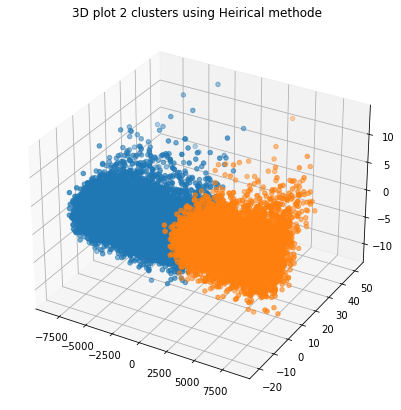

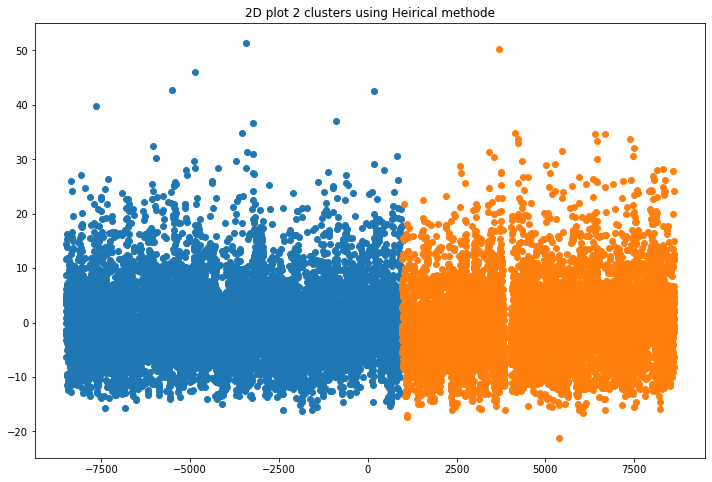

In [40]:
clf_herical=AgglomerativeClustering(n_clusters=2)
clf_herical.fit(x_reduced)
y_predict=clf_herical.fit_predict(x_reduced)
clustering_report(x_reduced,y["Sex"],y_predict,2,"Heirical")
plot_cluster(x_reduced,y["Sex"],y_predict,2,"Heirical")

4 Clusters Heirical Clustering Report:
homogeneity:  2.1069337668601936e-05
mutual information:  2.8908244996156407e-05
v_measure:  2.0960594866415532e-05
silhoutte:  0.5531192105728246
davies bouldin:  0.5029180476259563
calinski_harabasz:  77321.42964466655


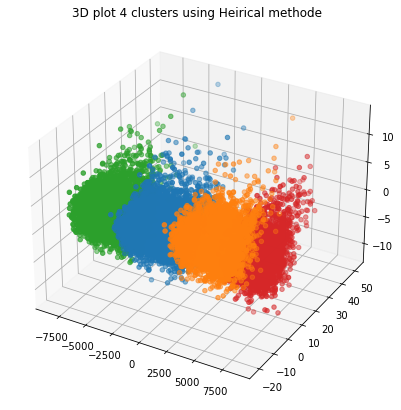

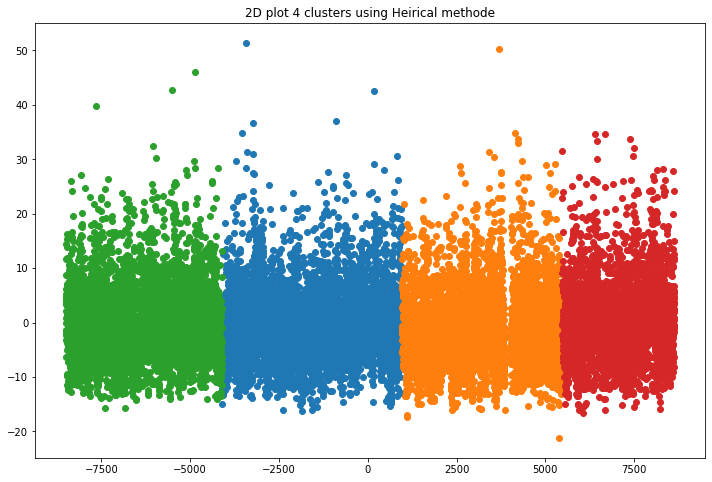

In [41]:
clf_herical=AgglomerativeClustering(n_clusters=4)
clf_herical.fit(x_reduced)
y_predict=clf_herical.fit_predict(x_reduced)
clustering_report(x_reduced,y["emotion_ID"],y_predict,4,"Heirical")
plot_cluster(x_reduced,y["emotion_ID"],y_predict,4,"Heirical")

10 Clusters Heirical Clustering Report:
homogeneity:  3.4459583706814454e-05
mutual information:  7.816786496609579e-05
v_measure:  4.27768377629473e-05
silhoutte:  0.5065855786630756
davies bouldin:  0.49809261757562134
calinski_harabasz:  156118.23882583197


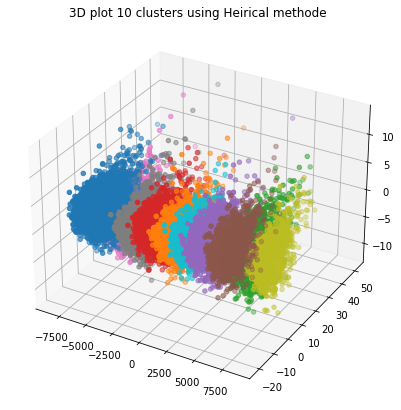

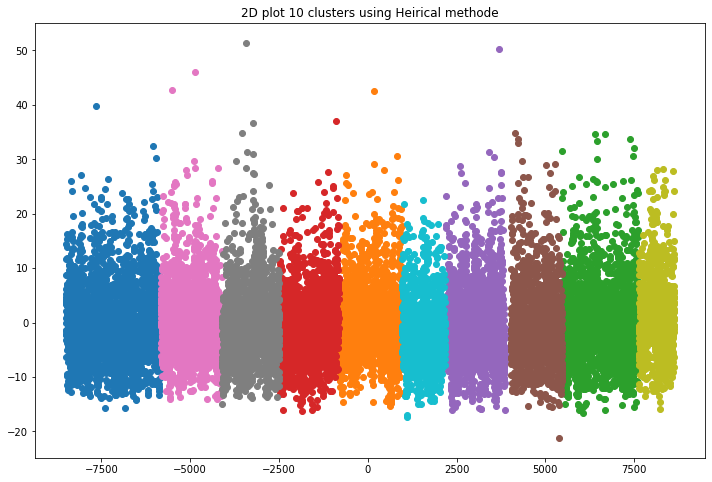

In [42]:
clf_herical=AgglomerativeClustering(n_clusters=10)
clf_herical.fit(x_reduced)
y_predict=clf_herical.fit_predict(x_reduced)
clustering_report(x_reduced,y["emotion_ID"],y_predict,10,"Heirical")
plot_cluster(x_reduced,y["emotion_ID"],y_predict,10,"Heirical")